## Student Name: Fatik Jan
## Student ID: 21031182

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sklearn.cluster as cluster

In [2]:
def read_data(filename):
    '''
    Returns two dataframes one with country as columns and the other with years as columns
    '''
    df = pd.read_excel(filename,skiprows=3)
    labels = ['Country Code', 'Indicator Name','Indicator Code']
    y_df = df.set_index('Country Name').drop(labels=labels,axis=1)
    c_df = y_df.transpose()
    return y_df, c_df

In [3]:
def remove_outlier(df_in):
    '''
    Removes outliers
    '''
    o=df_in[(np.abs(stats.zscore(df_in)) < 3).all(axis=1)]
   
    return o 


In [4]:
def normalize(v):
    '''
    normalizes the data between 1 and 0
    '''
    r=(v - v.min()) / (v.max() - v.min())
    return r

In [5]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

In [6]:
def make_clusters(ser1,ser2,n_clusters=3,column_names=None):
    '''
    Plots clusters of the data given
    '''
    df = remove_outlier(pd.concat([ser1, ser2], axis=1,keys=column_names).dropna())
    km = cluster.KMeans(n_clusters=n_clusters)
    x1 = df[column_names[0]].values.reshape(-1, 1)
    y1 = df[column_names[1]].values
    km.fit(normalize(x1),normalize(y1))
    labels = km.labels_
    col = ["orange","blue", "green","red","black"]
    for l in range(n_clusters):
        plt.plot(x1[labels==l], y1[labels==l], "o", markersize=5, color=col[l])
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])    
    plt.show()

In [7]:
eng1,eng2 = read_data('API_EG.USE.PCAP.KG.OE_DS2_en_excel_v2_4027677.xls')
urban1,urban2 = read_data('API_SP.URB.TOTL.IN.ZS_DS2_en_excel_v2_4019175.xls')
gdp1,gdp2 = read_data('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4021477.xls')

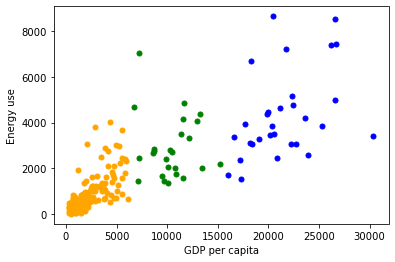

In [8]:
make_clusters(gdp2.mean(), eng2.mean(),n_clusters=3,column_names=['GDP per capita', 'Energy use'])

The graph show how countries with different gdp per capita have varying energy use. Countries that have lower gdp per capita on average use less energy than compared to countries where the gdp per capita is higher. Majority of the countries lie in the red cluster where gpd per capita and energy consumption both are low.  

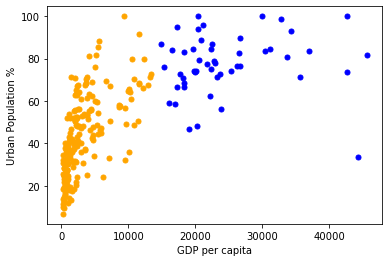

In [9]:
make_clusters(gdp2.mean(), urban2.mean(),n_clusters=2,column_names=['GDP per capita', 'Urban Population %'])

The graph shows gdp per capita and urban population. We can observe a positive correlation between the two indicators as expected. However urban population decreases significantly on lower gdp per capita values. The clusters show countries with lower gdp and urban as the blue cluster and the other countries as the red cluster.

In [10]:
def mse(orig, pred):
    mse = np.mean((orig-pred)**2)
    return mse

In [11]:
def exponential(t, t0,n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    
    t = t - t0
    f = n0 * np.power(np.e,g*t)
    
    return f

In [12]:
def fit_time(func, x_values,y_values,p0=None,xlabel = None,ylabel=None):
    popt, pcov = curve_fit(func, x_values, y_values,p0=p0,maxfev = 5000)
    y_pred = func(range(x_values[0],x_values[-1]+10),*popt)
    plt.plot(range(x_values[0],x_values[-1]+10),y_pred)
    plt.plot(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return mse(y_values,func(x_values,*popt))

C:\Users\fatik\AppData\Local\Temp/ipykernel_15012/3087150925.py:5: RuntimeWarning: overflow encountered in power
  f = n0 * np.power(np.e,g*t)


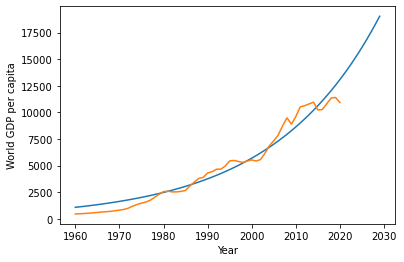

516492.9818059507

In [13]:
x_values = np.array([int(x) for x in  gdp2['World'].dropna().index])
y_values = gdp2['World'].dropna().values
fit_time(exponential,x_values,y_values,(1960,50,0.1),xlabel="Year",ylabel="World GDP per capita")


C:\Users\fatik\AppData\Local\Temp/ipykernel_15012/3087150925.py:5: RuntimeWarning: overflow encountered in power
  f = n0 * np.power(np.e,g*t)


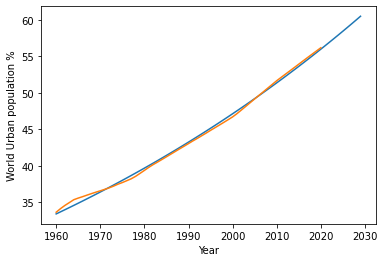

0.10972159876034926

In [14]:
x_values = np.array([int(x) for x in  urban2['World'].dropna().index])
y_values = urban2['World'].dropna().values
fit_time(exponential,x_values,y_values,(1960,50,0.1),xlabel="Year",ylabel="World Urban population %")

